In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def color_correct_image(dataset_image_path, output_path, reference_image_path='Reference Images/REFERENCE_CARD_2.jpg'):
    """
    Adjusts the color of the dataset image to match the color statistics of the reference image, using LAB color space.

    Parameters:
    - reference_image_path: str, path to the reference image.
    - dataset_image_path: str, path to the dataset image to be color corrected.
    - output_image_path: str, path where the adjusted image will be saved.

    Returns:
    - None
    """
    reference_image = cv2.imread(reference_image_path)
    if reference_image is None:
        raise FileNotFoundError(f"Reference image not found at {reference_image_path}")
    
    reference_lab = cv2.cvtColor(reference_image, cv2.COLOR_BGR2LAB)
    mean_ref, stddev_ref = cv2.meanStdDev(reference_lab)
    l_mean_ref, a_mean_ref, b_mean_ref = mean_ref.flatten()
    l_std_ref, a_std_ref, b_std_ref = stddev_ref.flatten()
    
    dataset_image = cv2.imread(dataset_image_path)
    if dataset_image is None:
        raise FileNotFoundError(f"Dataset image not found at {dataset_image_path}")
    
    dataset_lab = cv2.cvtColor(dataset_image, cv2.COLOR_BGR2LAB)
    mean_ds, stddev_ds = cv2.meanStdDev(dataset_lab)
    l_mean_ds, a_mean_ds, b_mean_ds = mean_ds.flatten()
    l_std_ds, a_std_ds, b_std_ds = stddev_ds.flatten()
    
    l_std_ds = l_std_ds if l_std_ds > 0 else 1
    a_std_ds = a_std_ds if a_std_ds > 0 else 1
    b_std_ds = b_std_ds if b_std_ds > 0 else 1
    
    l_adj = ((dataset_lab[:, :, 0] - l_mean_ds) * (l_std_ref / l_std_ds)) + l_mean_ref
    a_adj = ((dataset_lab[:, :, 1] - a_mean_ds) * (a_std_ref / a_std_ds)) + a_mean_ref
    b_adj = ((dataset_lab[:, :, 2] - b_mean_ds) * (b_std_ref / b_std_ds)) + b_mean_ref
    
    # Merge the adjusted channels
    adjusted_lab = cv2.merge([l_adj, a_adj, b_adj])
    
    # Clip the values to be within the valid range and convert to uint8
    adjusted_lab = np.clip(adjusted_lab, 0, 255).astype('uint8')
    
    # Convert back to RGB color space
    adjusted_rgb = cv2.cvtColor(adjusted_lab, cv2.COLOR_LAB2BGR)
    
    filename = dataset_image_path.split('/')[1][:-4]
    cv2.imwrite(f'{output_path}/{filename}_corrected.jpg', adjusted_rgb)

In [5]:
color_correct_image('Samples/sample_2_cropped.jpg', 'output')

# LAB color space demo

Displays an image in the LAB color space.

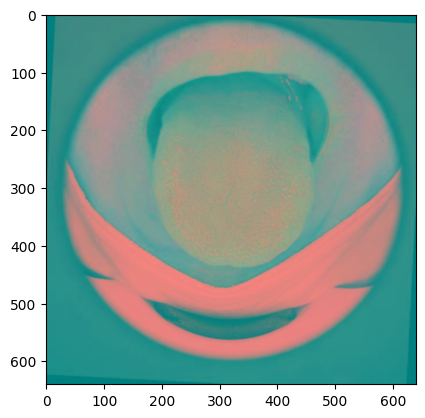

In [6]:
img_lab = cv2.imread('Samples/sample_3.jpg')
img_lab = cv2.cvtColor(img_lab, cv2.COLOR_BGR2LAB)

plt.imshow(img_lab)

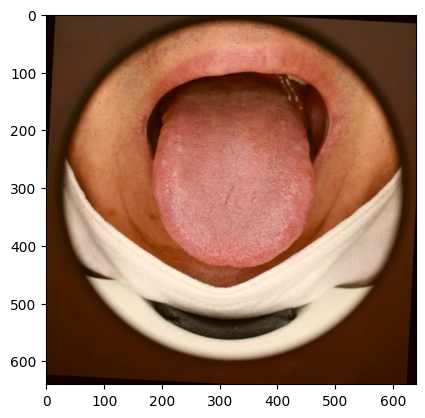

In [7]:
# Modify channel and convert back to RGB
img_lab[:,:,2] = img_lab[:,:,2] + 15
img_rgb = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)

plt.imshow(img_rgb)

# Color Histogram Visualization

The objective of this section is to observe differences in the color histograms between an image with color reference card and the same image without.

In [8]:
img_rgb = cv2.imread('Samples/sample_3.jpg')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

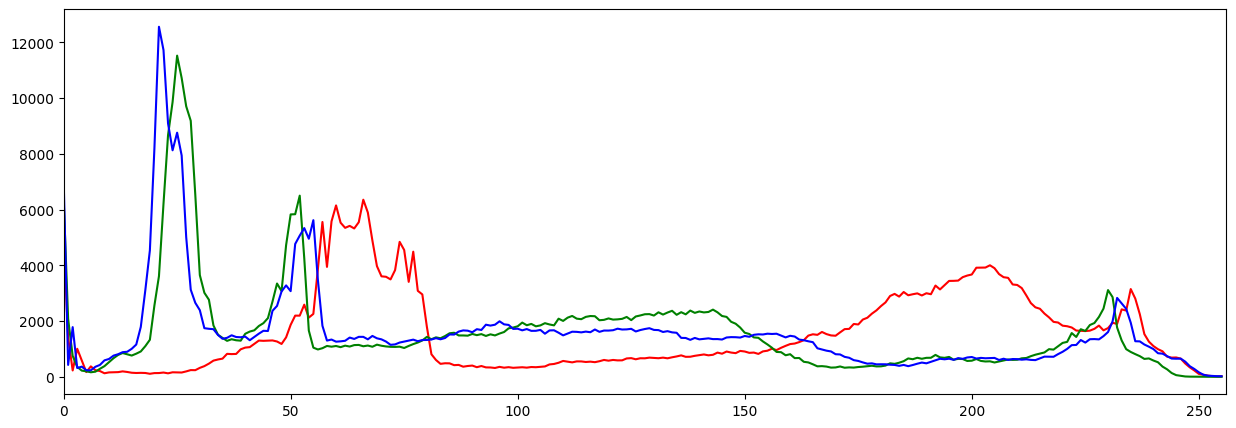

In [9]:
# Visualize color histogram of image
plt.figure(figsize=(15, 5))
for i, col in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

In [10]:
img_rgb_cropped = cv2.imread('Samples/sample_2_cropped.jpg')
img_rgb_cropped = cv2.cvtColor(img_rgb_cropped, cv2.COLOR_BGR2RGB)

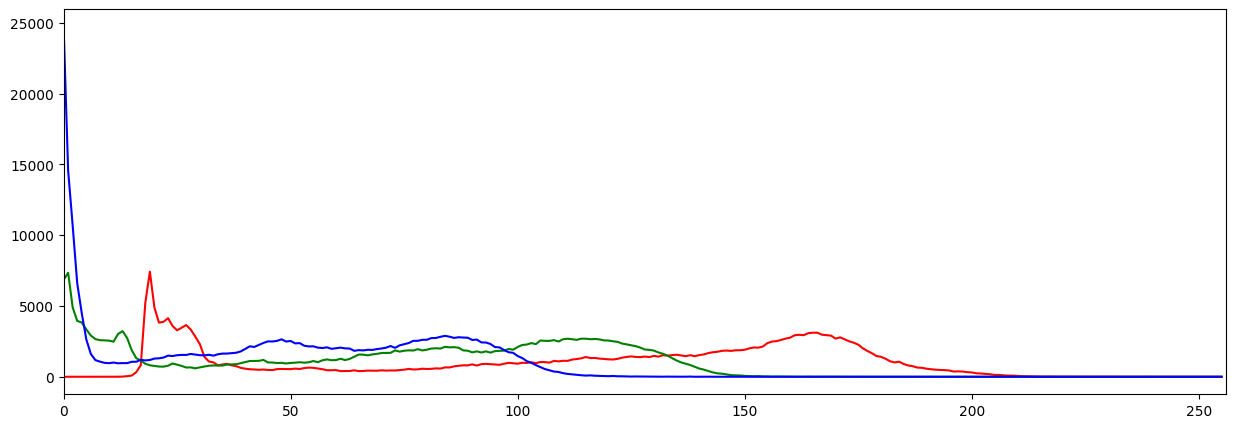

In [11]:
# Visualize color histogram of cropped image
plt.figure(figsize=(15, 5))
for i, col in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img_rgb_cropped], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])